**Downloading the dataset**

In [12]:
import kagglehub
df = kagglehub.dataset_download("minasameh55/king-country-houses-aa")

**Importing libaries**

In [13]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

**Creating dataframe**

In [14]:
data = pd.read_csv("king_ country_ houses_aa.csv")

**Checking for missing values**

In [15]:
fehlende_werte = data.isnull().sum()#check
print(fehlende_werte)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


**Explore the original data**

In [16]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Check for duplicate rows**

In [17]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


**Check unique values for columns that might be categorical**

In [18]:
print("\nChecking Unique Values for Key Features:")
print(f"Unique values in 'waterfront': {data['waterfront'].unique()}")
print(f"Unique values in 'view': {data['view'].unique()}")
print(f"Unique values in 'condition': {data['condition'].unique()}")
print(f"Unique values in 'grade': {data['grade'].unique()}")


Checking Unique Values for Key Features:
Unique values in 'waterfront': [0 1]
Unique values in 'view': [0 3 4 2 1]
Unique values in 'condition': [3 5 4 1 2]
Unique values in 'grade': [ 7  6  8 11  9  5 10 12  4  3 13  1]


**Correlation Matrix heatmap**

In [19]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


**Converting the string date into datetime**

In [20]:
data['date'] = pd.to_datetime(data['date'])
print("\n'date' column successfully converted to datetime.")


'date' column successfully converted to datetime.


**Distrubiution of house prices**

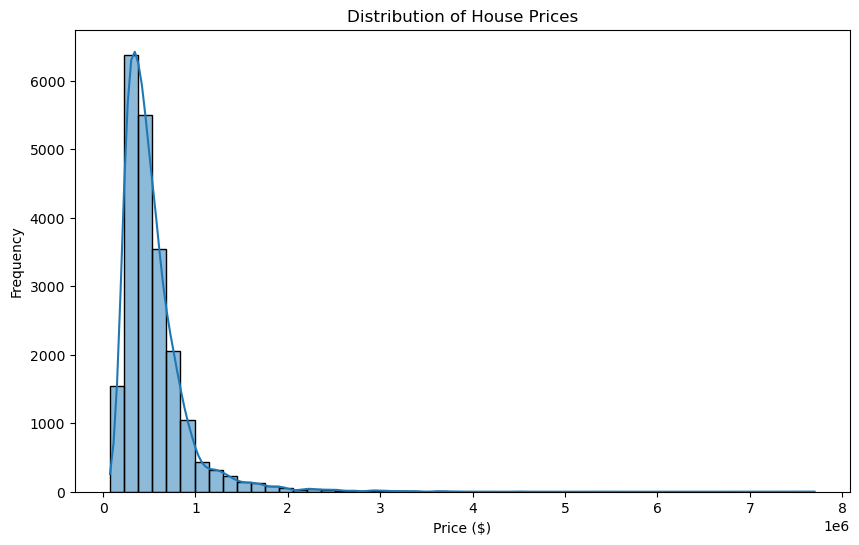

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')

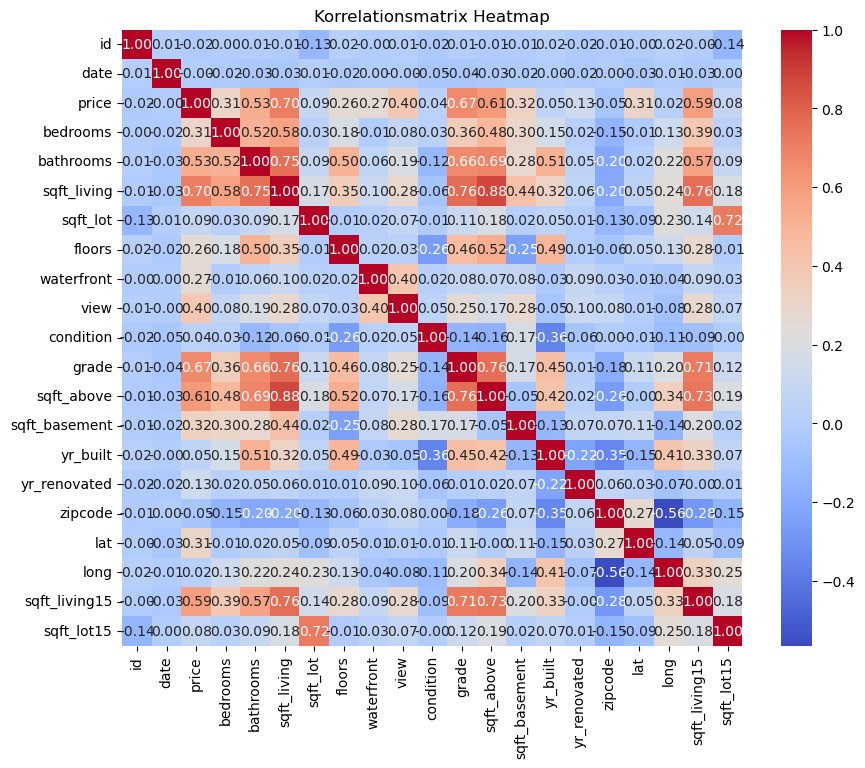

In [22]:
correlation_matrix = data.corr()

# Heatmap erstellen und anzeigen
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix Heatmap')
plt.show()

**Droping sqft_above and id**

In [23]:
data = data.drop(columns="sqft_above")


In [24]:
data = data.drop(columns="id")

In [25]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503


**Adding year and month as columns to check seasonality later**

In [26]:
data['year_sold'] = data['date'].dt.year
data['month_sold'] = data['date'].dt.month
#droping date
data = data.drop(columns="date")

**Adding age of the house and years since renovation**

In [27]:
data["age_house"] = data["year_sold"] - data["yr_built"]
data["renovated_years_ago"] = data["year_sold"] - data["yr_renovated"]
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year_sold', 'month_sold', 'age_house', 'renovated_years_ago'],
      dtype='object')

In [28]:
data = data.drop(columns= "yr_renovated")

In [29]:
data = data.drop(columns= "yr_built")

**New correalation matrix that filters correlations below 0.3 with the price**

In [30]:

correlation_matrix = data.corr()
#Selects columns that have a higher correlation than 0.3
threshold = 0.3
strong_corr_cols = correlation_matrix['price'][np.abs(correlation_matrix['price']) > threshold].index.tolist()
#creates a matrix that only contain relevant(above 0.3) columns
filtered_matrix = data[strong_corr_cols].corr()

# creates a mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(filtered_matrix, dtype=bool))

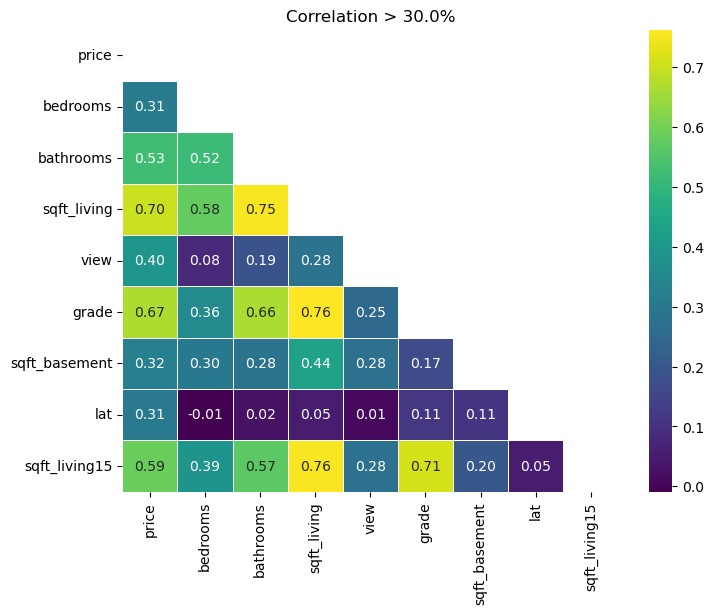

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title(f'Correlation > {threshold*100}%')
plt.show()

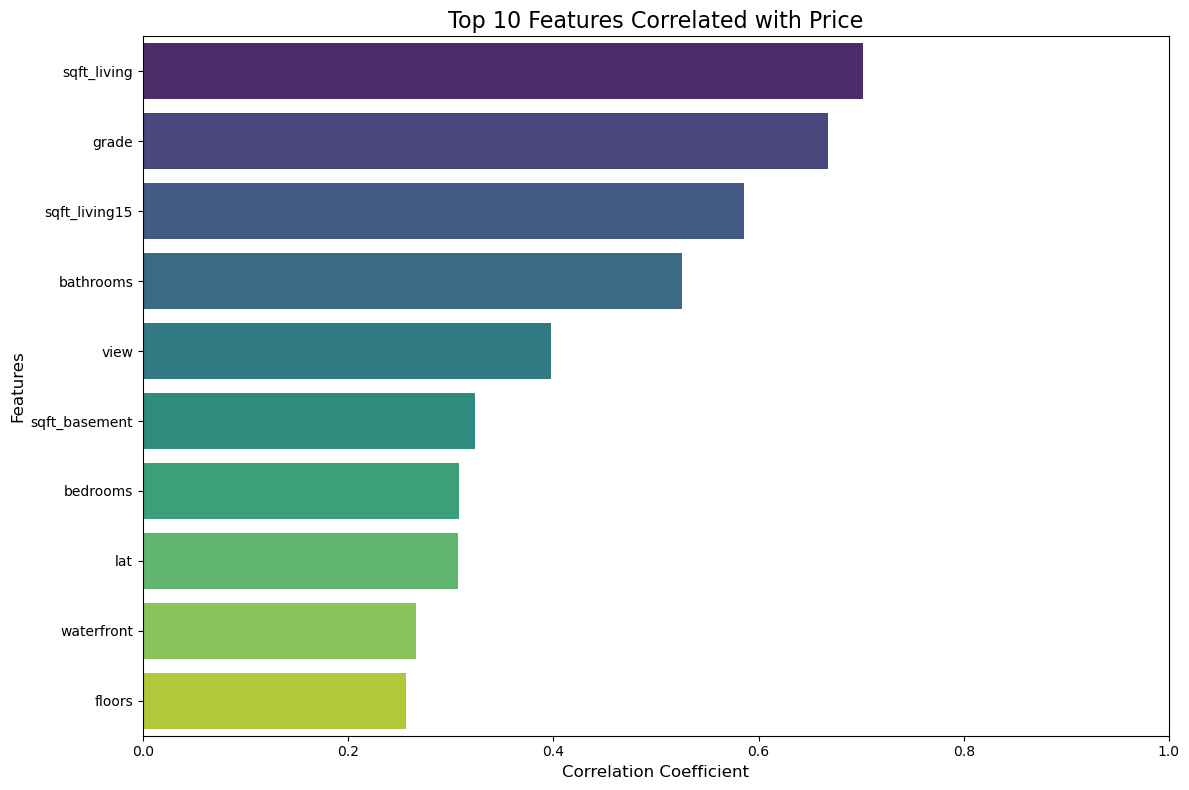

In [32]:
#sorts correllation by ascending order
correlations = data.corr(numeric_only=True)['price'].sort_values(ascending=False)
#filters for the top 10
top_correlated_features = correlations.drop('price').head(10)

# --- Create Bar Plot ---
plt.figure(figsize=(12, 8))
sns.barplot(x=top_correlated_features.values, y=top_correlated_features.index, palette='viridis')
plt.title('Top 10 Features Correlated with Price', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()
plt.savefig('top_correlated_features_barplot.png')

**X-y Split**

In [33]:
X = data.drop(columns='price')
Y = data['price']

**Handling categorical columns**

In [34]:
X_processed = pd.get_dummies(X, columns=['zipcode'], drop_first=True, dtype=float)

In [35]:
X_processed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0,0,3,7,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0,0,3,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0,0,5,7,910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0,0,3,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Scaling**

In [36]:
from sklearn.preprocessing import StandardScaler
# List of features to be scaled
features_to_scale = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
    'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
    'year_sold', 'age_house', 'renovated_years_ago'
]

scaler = StandardScaler()

# Apply scaling to X_processed DataFrame
X_processed[features_to_scale] = scaler.fit_transform(X_processed[features_to_scale])

X_processed.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,0,0,3,7,-0.658681,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,0,0,3,7,0.245141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,0,0,3,6,-0.658681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,0,0,5,7,1.397515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,0,0,3,8,-0.658681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Test-train split**

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

**Training on 7 diffrent models**

In [38]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [39]:

def compare_models(X_train, X_test, y_train, y_test, cv_folds=5, sort_by="R2 (Test)", ascending=False):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "KNN Regression": KNeighborsRegressor(),
        "XGBoost Regression": xgb.XGBRegressor(),
        "Random Forrest": RandomForestRegressor()
    }

    results = []
    predictions_dict = {}
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions_test = model.predict(X_test)
        predictions_train = model.predict(X_train)
        predictions_dict[model_name] = predictions_test

        # Train/Test metrics
        r2_test = r2_score(y_test, predictions_test)
        r2_train =r2_score(y_train, predictions_train)
        mse_test = mean_squared_error(y_test, predictions_test)
        mse_train = mean_squared_error(y_train, predictions_train)
        rmse_test = np.sqrt(mse_test)
        rmse_train = np.sqrt(mse_train)
        mae_test = mean_absolute_error(y_test, predictions_test)
        mae_train = mean_absolute_error(y_train, predictions_train)

        # Cross-validation metrics
        cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
        cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))

        results.append({
            "Model": model_name,
            "R2 (Test)": r2_test,
            "R2 (Train)": r2_train,
            "RMSE (Test)": rmse_test,
            "RMSE (Train)": rmse_train,
            "MSE (Test)": mse_test,
            "MSE (Train)": mse_train,
            "MAE (Test)": mae_test,
            "MAE (Train)": mae_train,
            "CV R2 (Mean)": np.mean(cv_r2),
            "CV R2 (Std)": np.std(cv_r2),
            "CV RMSE (Mean)": np.mean(cv_rmse),
            "CV RMSE (Std)": np.std(cv_rmse)
        })

    results_df = pd.DataFrame(results).set_index("Model")
    results_df = results_df.sort_values(by=sort_by, ascending=ascending)

    return results_df, predictions_dict
    

In [40]:
results_df, preds = compare_models(X_train, X_test, y_train, y_test, sort_by="RMSE (Test)", ascending=True)

In [41]:
print(results_df)
#r2

                    R2 (Test)  R2 (Train)    RMSE (Test)   RMSE (Train)  \
Model                                                                     
Random Forrest       0.853339    0.983194  148901.595708   46857.456262   
XGBoost Regression   0.848598    0.975598  151289.559519   56462.597319   
Lasso Regression     0.808175    0.809931  170292.258245  157582.491694   
Linear Regression    0.808167    0.809939  170296.031639  157579.008658   
Ridge Regression     0.807808    0.809687  170455.150029  157683.707885   
KNN Regression       0.727931    0.854372  202806.468404  137935.257907   
Decision Tree        0.714655    1.000000  207695.745665       0.000000   

                      MSE (Test)   MSE (Train)     MAE (Test)   MAE (Train)  \
Model                                                                         
Random Forrest      2.217169e+10  2.195621e+09   72061.609598  25357.749589   
XGBoost Regression  2.288853e+10  3.188025e+09   70418.753463  40188.559063   
Lasso Re

In [42]:
print(preds)

{'Linear Regression': array([ 365305.56890409,  824871.4401827 , 1229079.1427583 , ...,
        374589.58260905,  664977.99577231,  383243.51295008]), 'Ridge Regression': array([ 363707.22807566,  822152.18901959, 1231838.37256261, ...,
        384568.76414988,  657770.75491668,  373130.51062817]), 'Lasso Regression': array([ 364800.99893445,  824525.17608355, 1229625.87736861, ...,
        376303.19508851,  663620.03515153,  381514.62952288]), 'Decision Tree': array([ 397500.,  646000., 1288000., ...,  280000.,  537000.,  345000.]), 'KNN Regression': array([355040., 702000., 996400., ..., 313400., 592640., 342600.]), 'XGBoost Regression': array([ 400840.38,  909672.06, 1040736.  , ...,  311994.28,  573605.5 ,
        346532.88], dtype=float32), 'Random Forrest': array([ 382794.5 ,  852635.4 , 1110145.  , ...,  283106.95,  584099.87,
        340300.26])}


In [43]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,age_house,renovated_years_ago
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,98178,47.5112,-122.257,1340,5650,2014,10,59,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,98125,47.7210,-122.319,1690,7639,2014,12,63,23
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,98028,47.7379,-122.233,2720,8062,2015,2,82,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,98136,47.5208,-122.393,1360,5000,2014,12,49,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,98074,47.6168,-122.045,1800,7503,2015,2,28,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,0,98103,47.6993,-122.346,1530,1509,2014,5,5,2014
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,0,98146,47.5107,-122.362,1830,7200,2015,2,1,2015
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,0,98144,47.5944,-122.299,1020,2007,2014,6,5,2014
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,0,98027,47.5345,-122.069,1410,1287,2015,1,11,2015


**GridSearch for RandomForest model**

In [44]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [1, 2, 5, 10]  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1 # Show progress during the search
)
print("Starting GridSearch to find the best Random Forest parameters...")
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGridSearch finished.")
print(f"Best Hyperparameters: {best_params}")
print(f"Best R-squared score (Cross-Validation): {best_score:.4f}")

y_pred_test = best_rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)


Starting GridSearch to find the best Random Forest parameters...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

GridSearch finished.
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared score (Cross-Validation): 0.8770


In [45]:
y_pred_train = best_rf_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(r2_train, r2_test)

0.9819240287564316 0.8589951310097288


**Top 10 most important features for RandomForrest**

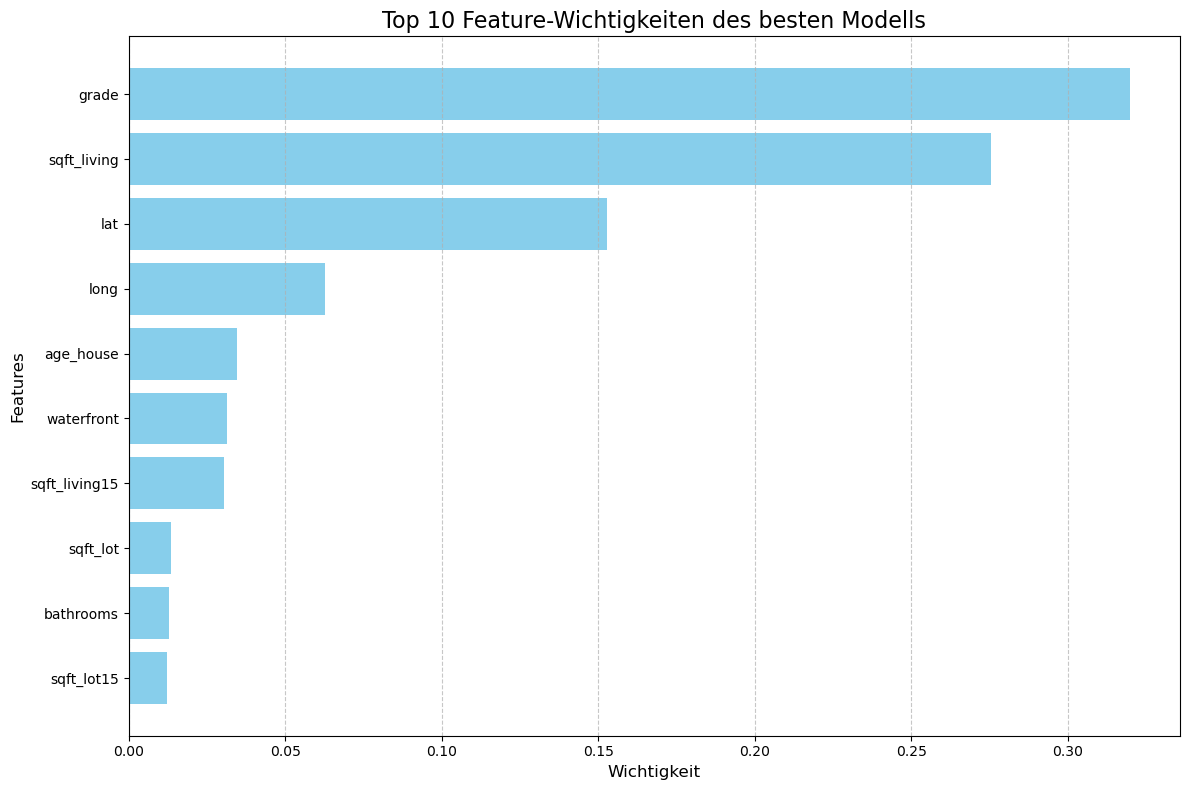

In [46]:
# Get feature importances from the best model
importances = best_rf_model.feature_importances_
# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Wichtigkeit', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Feature-Wichtigkeiten des besten Modells', fontsize=16)
plt.gca().invert_yaxis()  # Put the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**GridSearch XGBoost**

In [47]:
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 10, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [1, 2, 5, 10]  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1 # Show progress during the search
)
print("Starting GridSearch to find the best Random Forest parameters...")
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("\nGridSearch finished.")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Best R-squared score (Cross-Validation): {best_score_xgb:.4f}")

y_pred_test = best_xgb_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

#to check for overfitting
y_pred_train = best_xgb_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)


Starting GridSearch to find the best Random Forest parameters...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

GridSearch finished.
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 1, 'n_estimators': 200}
Best R-squared score (Cross-Validation): 0.8784
0.9869121533179012


**Top 10 most important features for XGBoost**

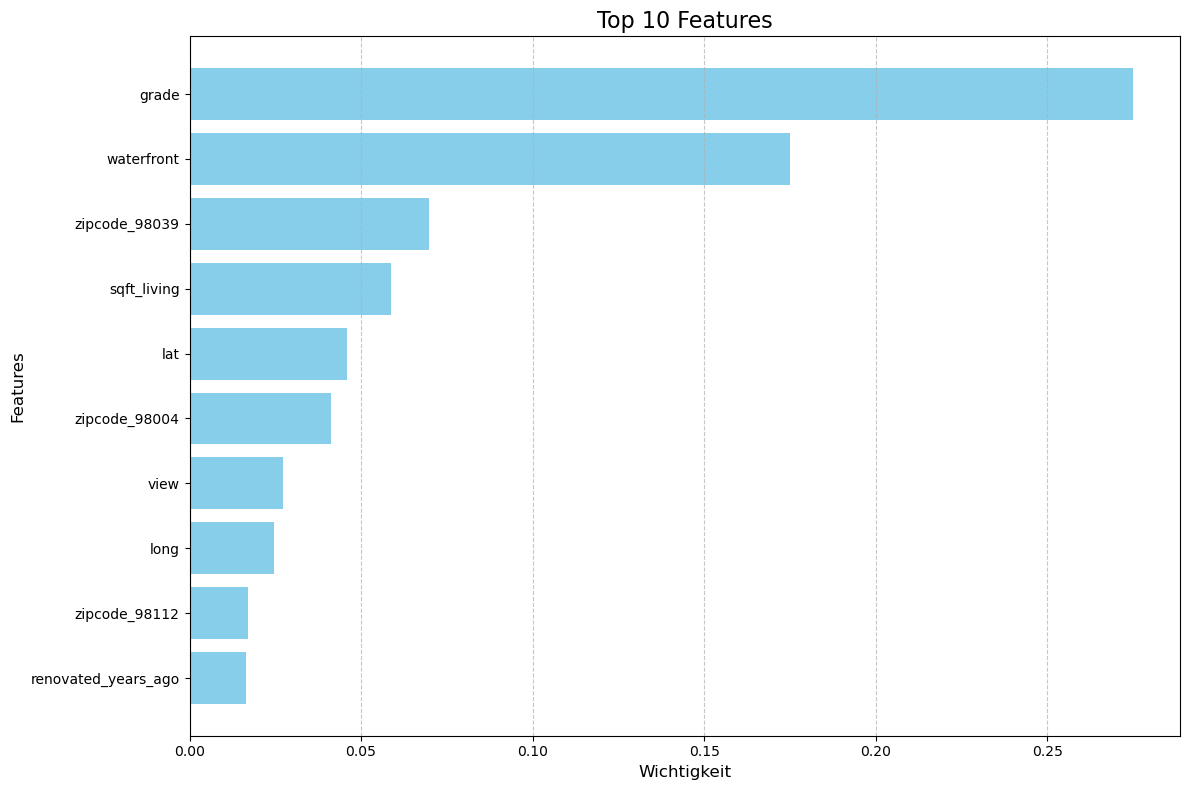

In [48]:
# Get feature importances from the best model
importances = best_xgb_model.feature_importances_
# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_df_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df_xgb.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Wichtigkeit', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Features', fontsize=16)
plt.gca().invert_yaxis()  # Put the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**RandomForrest model for houses over 650k**

In [49]:
#filtering the data for prices over 650k
filtered_data = data[data['price'] >= 650000]

#X-y split
X = filtered_data.drop('price', axis=1) 
y = filtered_data['price']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize RamdonForrest 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#create predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nTraining the RandomForrest model for houses >= 650.000...")
print(f"R2-Score (train): {r2_train:.4f}")
print(f"R2-Score (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.2f}")


Training the RandomForrest model for houses >= 650.000...
R2-Score (train): 0.9686
R2-Score (test): 0.7854
RMSE (test): 219243.87


**GridSearch for RandomForrest model for houses above 650k**

In [50]:
rf_model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [1, 2, 5, 10]  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1 # Show progress during the search
)
print("Starting GridSearch to find the best Random Forest parameters...")
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGridSearch finished.")
print(f"Best Hyperparameters: {best_params}")
print(f"Best R-squared score (Cross-Validation): {best_score:.4f}")

y_pred_test = best_rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

y_pred_train = best_rf_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(r2_train, r2_test)

Starting GridSearch to find the best Random Forest parameters...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

GridSearch finished.
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared score (Cross-Validation): 0.7738
0.9688484284506521 0.788643209217307


**Top 10 features**

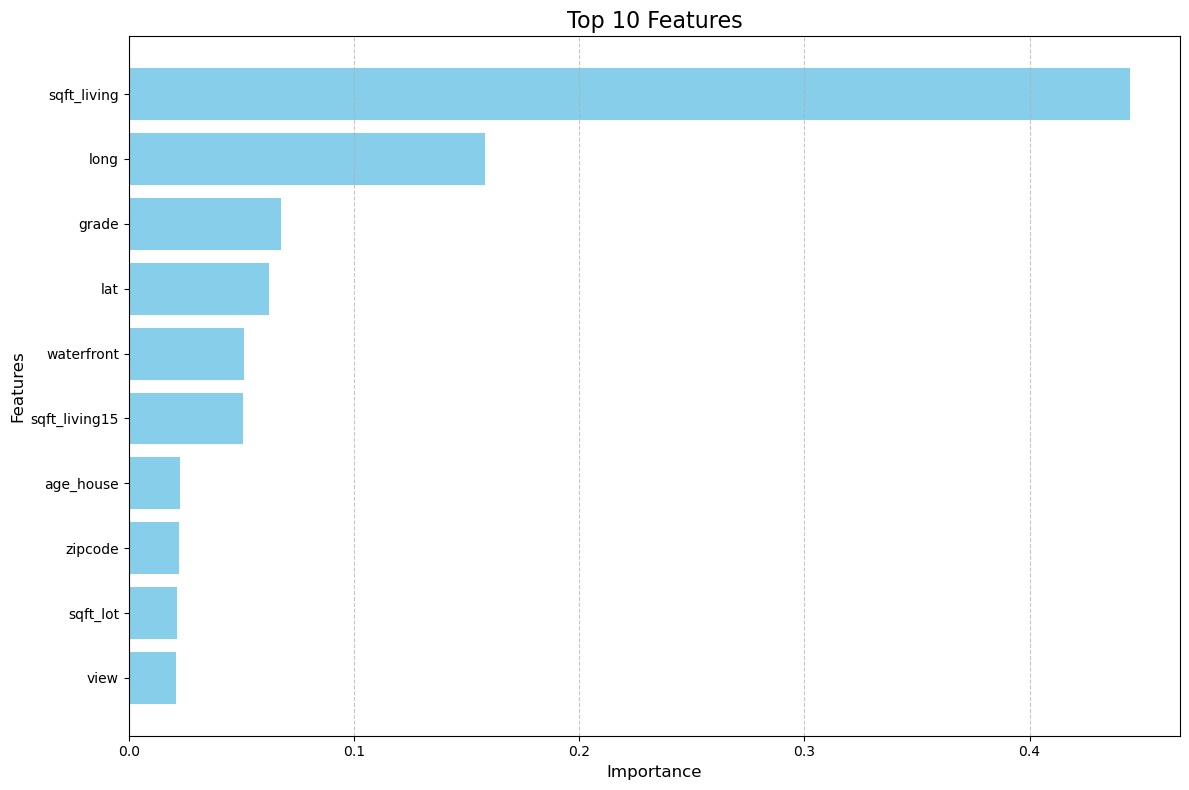

In [51]:
# Get feature importances from the best model
importances = best_rf_model.feature_importances_
# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Features', fontsize=16)
plt.gca().invert_yaxis()  # Put the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**XGBoost for Model houses over 650k**

In [52]:
#filtering the data for prices over 650k
filtered_data = data[data['price'] >= 650000]

#X-y split
X = filtered_data.drop('price', axis=1) 
y = filtered_data['price']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#initialize RamdonForrest 
best_xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
best_xgb_model.fit(X_train, y_train)

#create predictions
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nTraining the XGBoost model for houses >= 650.000...")
print(f"R2-Score (train): {r2_train:.4f}")
print(f"R2-Score (test): {r2_test:.4f}")
print(f"RMSE (test): {rmse_test:.2f}")


Training the XGBoost model for houses >= 650.000...
R2-Score (train): 0.9921
R2-Score (test): 0.7971
RMSE (test): 213172.86


**GridSearch for XGBoost for houses above 650k**

In [53]:
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 10, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [1, 2, 5, 10]  # Minimum number of samples required to split an internal node
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1 # Show progress during the search
)
print("Starting GridSearch to find the best Random Forest parameters...")
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
best_params_xgb = grid_search.best_params_
best_score_xgb = grid_search.best_score_

print("\nGridSearch finished.")
print(f"Best Hyperparameters: {best_params_xgb}")
print(f"Best R-squared score (Cross-Validation): {best_score_xgb:.4f}")

y_pred_test = best_xgb_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

#to check for overfitting
y_pred_train = best_xgb_model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

Starting GridSearch to find the best Random Forest parameters...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

GridSearch finished.
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 1, 'n_estimators': 200}
Best R-squared score (Cross-Validation): 0.8056
0.99858016674261


**Top 10 features for XGBoost model with houses over 650k**

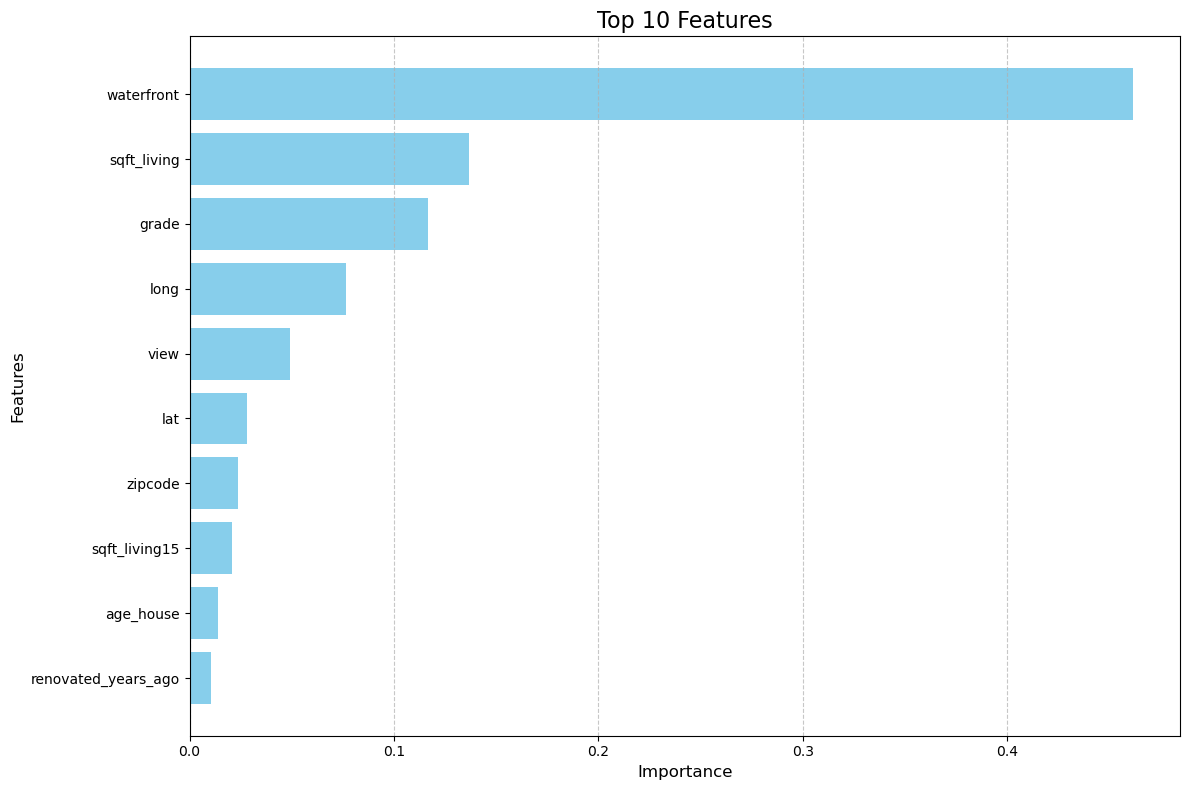

In [54]:
# Get feature importances from the best model
importances = best_xgb_model.feature_importances_
# Get feature names from the training data
feature_names = X_train.columns

# Create a DataFrame for easy visualization
feature_importance_df_xgb = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df_xgb.head(10)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Features', fontsize=16)
plt.gca().invert_yaxis()  # Put the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Create a Basemodel without feature engineering**

In [56]:
data.info()
X_base=data.drop(columns= ["price"])
y_base = data["price"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21613 non-null  float64
 1   bedrooms             21613 non-null  int64  
 2   bathrooms            21613 non-null  float64
 3   sqft_living          21613 non-null  int64  
 4   sqft_lot             21613 non-null  int64  
 5   floors               21613 non-null  float64
 6   waterfront           21613 non-null  int64  
 7   view                 21613 non-null  int64  
 8   condition            21613 non-null  int64  
 9   grade                21613 non-null  int64  
 10  sqft_basement        21613 non-null  int64  
 11  zipcode              21613 non-null  int64  
 12  lat                  21613 non-null  float64
 13  long                 21613 non-null  float64
 14  sqft_living15        21613 non-null  int64  
 15  sqft_lot15           21613 non-null 

In [57]:
X_basetrain, X_basetest, y_basetrain, y_basetest = train_test_split(X_base, y_base, random_state=0 ,test_size= 0.2)

In [58]:
def compare_models(X_basetrain, X_basetest, y_basetrain, y_basetest, cv_folds=5, sort_by="R2 (Test)", ascending=False):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "KNN Regression": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "XGBoost Regression": xgb.XGBRegressor(random_state=42)
    }

    results = []
    predictions_dict = {}
    
    kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

    for model_name, model in models.items():
        model.fit(X_basetrain, y_basetrain)
        predictions_test = model.predict(X_basetest)
        predictions_train = model.predict(X_basetrain)
        predictions_dict[model_name] = predictions_test

        # Train/Test metrics
        r2_test = r2_score(y_basetest, predictions_test)
        r2_train = r2_score(y_basetrain, predictions_train)
        mse = mean_squared_error(y_basetest, predictions_test)
        rmse = np.sqrt(mse) # Correct way to calculate RMSE
        mae_test = mean_absolute_error(y_basetest, predictions_test)
        mae_train = mean_absolute_error(y_basetrain, predictions_train)
        
        mse_train = mean_squared_error(y_basetrain, predictions_train)
        rmse_train = np.sqrt(mse_train) # Correct way for training RMSE

        # Cross-validation metrics
        cv_r2 = cross_val_score(model, X_basetrain, y_basetrain, cv=kf, scoring='r2')
        cv_rmse = np.sqrt(-cross_val_score(model, X_basetrain, y_basetrain, cv=kf, scoring='neg_mean_squared_error'))

        results.append({
            "Model": model_name,
            "R2 (Test)": r2_test,
            "R2 (Train)": r2_train,
            "RMSE (Test)": rmse,
            "RMSE (Train)": rmse_train,
            "MSE (Test)": mse,
            "MSE (Train)": mse_train,
            "MAE (Test)": mae_test,
            "MAE (Train)": mae_train,
            "CV R2 (Mean)": np.mean(cv_r2),
            "CV R2 (Std)": np.std(cv_r2),
            "CV RMSE (Mean)": np.mean(cv_rmse),
            "CV RMSE (Std)": np.std(cv_rmse)
        })

    results_df = pd.DataFrame(results).set_index("Model")
    results_df = results_df.sort_values(by=sort_by, ascending=ascending)

    return results_df, predictions_dict

In [59]:
print("Running Baseline Models on Original Price Data")
X_basetrain, X_basetest, y_basetrain, y_basetest = train_test_split(X_base, y_base, random_state=0 ,test_size= 0.2)
results_df_original, preds_original = compare_models(X_basetrain, X_basetest, y_basetrain, y_basetest, sort_by="RMSE (Test)", ascending=True)
print(results_df_original)

Running Baseline Models on Original Price Data
                    R2 (Test)  R2 (Train)    RMSE (Test)   RMSE (Train)  \
Model                                                                     
XGBoost Regression   0.900066    0.977749  109016.360589   55554.606609   
Random Forest        0.892268    0.982100  113189.987296   49827.444380   
Decision Tree        0.762721    1.000000  167982.910495      13.443969   
Ridge Regression     0.696382    0.702105  190019.992225  203270.406739   
Lasso Regression     0.696313    0.702107  190041.366983  203269.730993   
Linear Regression    0.696311    0.702107  190042.082990  203269.730224   
KNN Regression       0.479960    0.671263  248687.385334  213533.827777   

                      MSE (Test)   MSE (Train)     MAE (Test)    MAE (Train)  \
Model                                                                          
XGBoost Regression  1.188457e+10  3.086314e+09   63190.573321   39729.613631   
Random Forest       1.281197e+10  2.4